In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyp
import seaborn
%matplotlib inline

In [46]:
df = pd.read_csv('Mall_Customers.csv')

In [47]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [48]:
df.shape

(200, 5)

In [49]:
df.isnull().values.any()

False

In [50]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [51]:
df.rename(columns={'Annual Income (k$)' :'Income', 'Spending Score (1-100)':'Score' }, inplace=True)

In [52]:
df

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


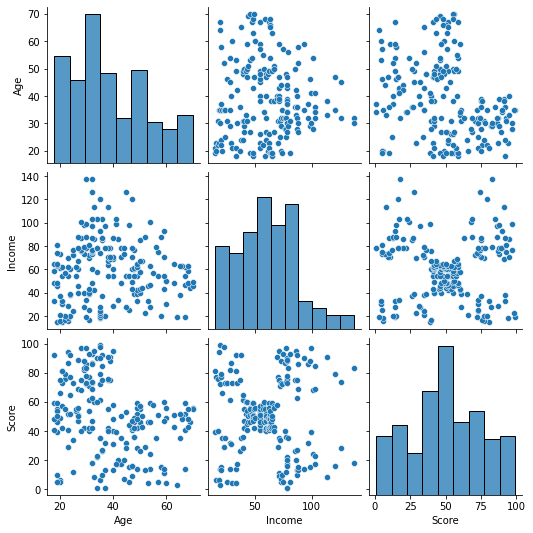

In [53]:
seaborn.pairplot(df[['Age','Income','Score']])

In [54]:
import sklearn.cluster as cluster

# K-Means Cluster Algorithm

In [55]:
km_cls = cluster.KMeans(n_clusters=5)

In [56]:
km_cls = km_cls.fit(df[['Income','Score']])

In [57]:
km_cls.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [58]:
df['Income_clusters_no']=km_cls.labels_

In [59]:
df

,CustomerID,Gender,Age,Income,Score,Income_clusters_no
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


In [60]:
df['Income_clusters_no'].value_counts()

0    81
4    39
1    35
2    23
3    22
Name: Income_clusters_no, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Score'>

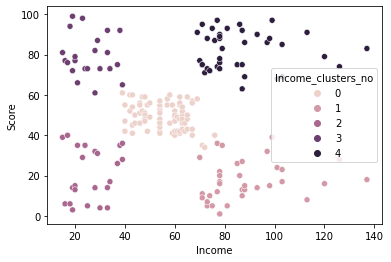

In [61]:
seaborn.scatterplot(x='Income', y='Score', hue='Income_clusters_no', data=df)

In [71]:
from sklearn.cluster import KMeans

In [72]:
k_range= range(1,12)
wcss=[]

In [73]:
for k in k_range:
    km= KMeans(n_clusters=k)
    km.fit(df[['Income','Score']])
    wcss.append(km.inertia_)
  

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [74]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30273.394312070028,
 25030.383098520324,
 21794.885609098194,
 19710.030271660795,
 17581.701809570353]

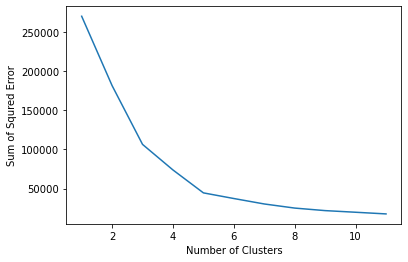

In [76]:
pyp.xlabel('Number of Clusters')
pyp.ylabel('Sum of Squred Error')
pyp.plot(k_range,wcss)